# 1.0 An end-to-end classification problem



## 1.1 Dataset description



We'll be looking at individual income in the United States. The **data** is from the **1994 census**, and contains information on an individual's **marital status**, **age**, **type of work**, and more. The **target column**, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than **50k a year**.

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).

Let's take the following steps:

1. Load Libraries
2. Get data, including EDA
3. Clean, prepare and manipulate Data (feature engineering)
4. Modeling (train and test)
5. Algorithm Tuning
6. Finalizing the Model


## 1.2 Load Libraries

In [163]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [164]:
import sklearn
sklearn.__version__

'0.23.2'

In [341]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import joblib

## 1.3 Get data & EDA

### 1.3.1 Import the dataset

In [166]:
# columns used 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex','capital_gain', 'capital_loss', 'hours_per_week',
           'native_country','high_income']
# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header=None,
                   names=columns)
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
# 1. check if there are missing values
# 2. identify the column types
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [168]:
# considering only continuous variables
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [169]:
# capital_gain? a lot of zeros?
income.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital_gain, Length: 119, dtype: int64

In [170]:
# capital_loss? a lot of zeros?
income.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capital_loss, Length: 92, dtype: int64

In [171]:
# check the cardinality and mode of categorical variables
income.describe(include="O")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,high_income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


### 1.3.2 Exploratory Data Analysis

In [172]:
# native_country help us?
pd.crosstab(income.high_income,income.native_country)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
high_income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,17,93,21,61,40,1,12,14,10,60,25,19,48,71,38,16,610,32,14,29,137,48,33,102,9,64,31,15,17,21999,62,10
>50K,146,7,39,20,2,25,2,4,9,30,12,44,8,3,4,0,1,6,3,40,18,5,25,10,24,2,33,2,0,2,61,12,4,12,3,16,20,3,2,7171,5,6


In [173]:
# what the sex column can help us?
pd.crosstab(income.high_income,income.sex)
#pd.crosstab(income.high_income,income.sex).apply(lambda r: r/r.sum(), axis=1)

sex,Female,Male
high_income,,
<=50K,9592,15128
>50K,1179,6662


In [174]:
# income vs [sex & race]?
pd.crosstab(income.high_income,[income.sex,income.race])

sex                      Female                             ...   Male              
race         Amer-Indian-Eskimo  Asian-Pac-Islander  Black  ...  Black  Other  White
high_income                                                 ...                     
 <=50K                      107                 303   1465  ...   1272    143  13085
 >50K                        12                  43     90  ...    297     19   6089

[2 rows x 10 columns]

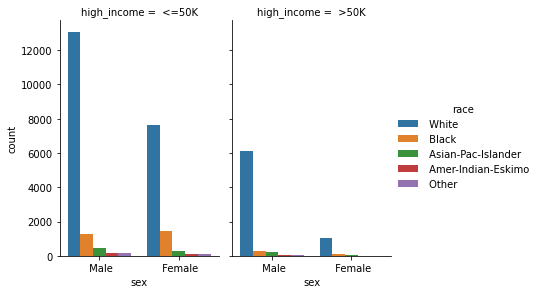

In [175]:
# income vs [sex & race] using dataviz
g = sns.catplot(x="sex", 
                hue="race", 
                col="high_income",
                data=income, kind="count",
                height=4, aspect=.7)

In [176]:
# income vs workclass?
pd.crosstab(income.high_income,income.workclass)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
high_income,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


In [177]:
# income vs [sex,workclass]
pd.crosstab(income.high_income,[income.sex, income.workclass])

sex          Female               ...       Male             
workclass         ?  Federal-gov  ...  State-gov  Without-pay
high_income                       ...                        
 <=50K          787          259  ...        524            9
 >50K            52           56  ...        285            0

[2 rows x 18 columns]

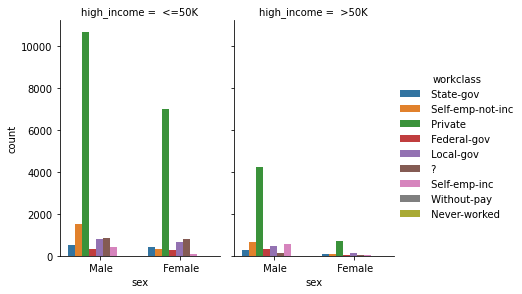

In [178]:
g = sns.catplot(x="sex", 
                hue="workclass", 
                col="high_income",
                data=income, kind="count",
                height=4, aspect=.7)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


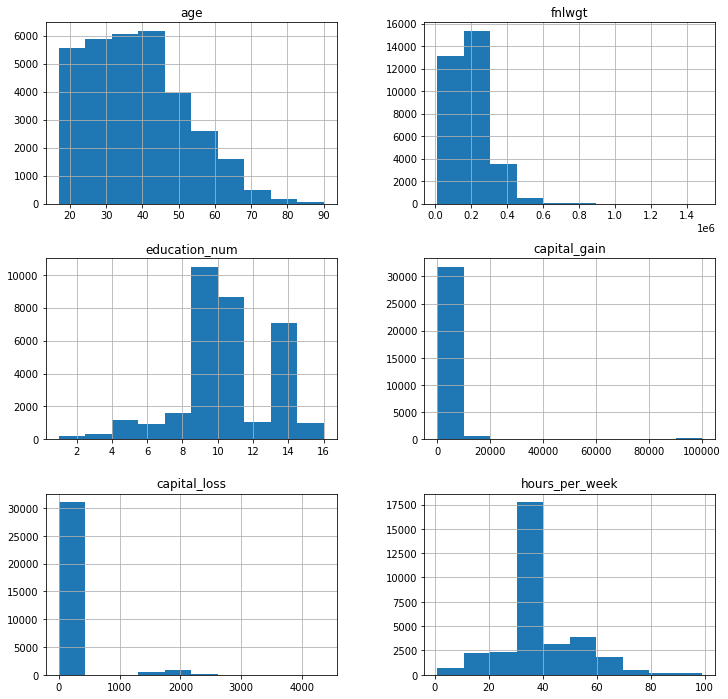

In [179]:
# histogram help us to understand the skewness of variables
fig, ax = plt.subplots(1,1,figsize=(12,12))
income.hist(ax=ax)
plt.show()

Can you imagine other analysis? Go ahead...

## 1.4 Clean, prepare and manipulate data

### 1.4.1 Introduction

Data preparation may be the most important part of a machine learning project. It is the most time-consuming part, although it seems to be the least discussed topic. Data preparation sometimes referred to as data preprocessing, is the act of transforming raw data into a form
that is appropriate for modeling. Machine learning algorithms require input data to be numbered, and most algorithm implementations maintain this expectation. As such, if your data contains data types and values that are not numbers, such as labels, you will need to change the data
into numbers. Further, specific machine learning algorithms have expectations regarding the data types, scale, probability distribution, and relationships between input variables, and you may need to change the data to meet these expectations.

The philosophy of data preparation is to discover how to best expose the unknown underlying structure of the problem to the learning algorithms. This often requires an iterative path of experimentation through a suite of different data preparation techniques in order to discover what works well or best. The vast majority of the machine learning algorithms you may use on a project are years to decades old. The implementation and application of the algorithms are well understood. So much so that they are routine, with amazing, fully-featured open-source machine learning libraries like scikit-learn in Python. The thing that is different from project to
project is the data. You may be the first person (ever!) to use a specific dataset as the basis for a predictive modeling project. As such, the preparation of the data in order to best present it to the problem of the learning algorithms is the primary task of any modern machine learning
project.

The challenge of data preparation is that each dataset is unique and different. Datasets differ in the number of variables (tens, hundreds, thousands, or more), the types of the variables (numeric, nominal, ordinal, boolean), the scale of the variables, the drift in the values over
time, and more. As such, this makes discussing data preparation a challenge. Either specific case studies are used, or focus is put on the general methods that can be used across projects. The result is that neither approach is explored.

### 1.4.2 Removal duplications

In [180]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  high_income     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [181]:
# There are duplicated rows
income.duplicated().sum()

24

In [182]:
# Delete duplicated rows
income.drop_duplicates(inplace=True)
income.duplicated().sum()

0

### 1.4.3 Removal Outliers (with data leakage)

In [183]:
# Verify if columns[int64] has outliers (with data leakage!!!!!!!)

# data
x = income.select_dtypes("int64")
y = np.where(income["high_income"] == ' <=50K',0,1)

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

print("Income shape [original]: {}".format(income.shape))
print("Income shape [outlier removal]: {}".format(income.loc[mask,:].shape))

# income with outliner
income_w = income.loc[mask,:].copy()
income_w.head()

Income shape [original]: (32537, 15)
Income shape [outlier removal]: (30977, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


### 1.4.4 Train & Split (avoid data leakage)

In [295]:
# split-out train/validation and test dataset
x_train, x_test, y_train, y_test = train_test_split(income.drop(labels="high_income",axis=1),
                                                    income["high_income"],
                                                    test_size=0.30,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=income["high_income"])

In [296]:
print("X train: {}".format(x_train.shape))
print("y train: {}".format(y_train.shape))
print("X test: {}".format(x_test.shape))
print("y test: {}".format(y_test.shape))

X train: (22775, 15)
y train: (22775,)
X test: (9762, 15)
y test: (9762,)


#### 1.4.4.1 Removal Outliers

In [297]:
# Verify if columns[int64] has outliers (without data leakage!!!!!!!)

# data
x = x_train.select_dtypes("int64").copy()

# identify outlier in the dataset
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

print("X_train shape [original]: {}".format(x_train.shape))
print("X_train shape [outlier removal]: {}".format(x_train.loc[mask,:].shape))

# income with outliner
x_train = x_train.loc[mask,:].copy()
y_train = y_train[mask].copy()

X_train shape [original]: (22775, 15)
X_train shape [outlier removal]: (21320, 15)


#### 1.4.4.1 Encoding target variable

If a categorical target variable needs to be encoded for a classification predictive modeling problem, then the [LabelEncoder class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) can be used.

In [298]:
# define a categorical encoding for target variable
le = LabelEncoder()

# fit and transoform y_train
y_train = le.fit_transform(y_train)

# transform y_test
y_test = le.transform(y_test)

print("Classes: {}".format(le.classes_))

Classes: [' <=50K' ' >50K']


In [299]:
# just in case you need the inverse transformation
le.inverse_transform([0, 1])

array([' <=50K', ' >50K'], dtype=object)

In [300]:
# sampling of transformed target variable
print(y_train[:5],y_test[:5])

[0 0 0 0 0] [1 0 0 0 0]


#### 1.4.4.2 Encoding independent variables [Experiment]

In [301]:
# just an experimentation

# drop=first erase redundant column
onehot = OneHotEncoder(sparse=False,drop="first")
# fit using x_train
onehot.fit(x_train["sex"].values.reshape(-1,1))

x_test_aux = x_test.copy()
x_train_aux = x_train.copy()

# transform train and test
x_train_aux[onehot.get_feature_names()] = onehot.transform(x_train_aux["sex"].values.reshape(-1,1))
x_test_aux[onehot.get_feature_names()] = onehot.transform(x_test_aux["sex"].values.reshape(-1,1))

x_test_aux.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x0_ Male
6533,35,Private,188069,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,13550,0,55,?,1.0
6444,51,Private,129177,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0.0
27909,27,Private,219863,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,1.0
17046,56,Local-gov,264436,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0.0
27573,50,Local-gov,164127,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,0.0


In [302]:
onehot.get_feature_names()

array(['x0_ Male'], dtype=object)

In [303]:
onehot.inverse_transform([[0]])

array([[' Female']], dtype=object)

#### 1.4.4.3 Encoding independent variables

In [304]:
# just to review what are categorical columns
x_train.select_dtypes("object").columns.to_list()

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [305]:
# 08 columns are object, transform them to Categorical

# transform object columns to Categorical
for name in x_train.select_dtypes("object").columns.to_list():
  onehot = OneHotEncoder(sparse=False,drop="first")
  # fit using x_train
  onehot.fit(x_train[name].values.reshape(-1,1))

  # transform train and test
  x_train[onehot.get_feature_names()] = onehot.transform(x_train[name].values.reshape(-1,1))
  x_test[onehot.get_feature_names()] = onehot.transform(x_test[name].values.reshape(-1,1))

In [306]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x0_ Male,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x0_ 11th,x0_ 12th,x0_ 1st-4th,x0_ 5th-6th,x0_ 7th-8th,x0_ 9th,x0_ Assoc-acdm,x0_ Assoc-voc,x0_ Bachelors,x0_ Doctorate,x0_ HS-grad,x0_ Masters,x0_ Preschool,x0_ Prof-school,x0_ Some-college,x0_ Married-AF-spouse,x0_ Married-civ-spouse,...,x0_ Cambodia,x0_ Canada,x0_ China,x0_ Columbia,x0_ Cuba,x0_ Dominican-Republic,x0_ Ecuador,x0_ El-Salvador,x0_ England,x0_ France,x0_ Germany,x0_ Greece,x0_ Guatemala,x0_ Haiti,x0_ Honduras,x0_ Hong,x0_ Hungary,x0_ India,x0_ Iran,x0_ Ireland,x0_ Italy,x0_ Jamaica,x0_ Japan,x0_ Laos,x0_ Mexico,x0_ Nicaragua,x0_ Outlying-US(Guam-USVI-etc),x0_ Peru,x0_ Philippines,x0_ Poland,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
17365,30,Private,161572,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,45,United-States,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380,54,Private,174319,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28968,29,Private,128777,7th-8th,4,Divorced,Craft-repair,Unmarried,White,Female,0,0,55,United-States,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3476,18,Private,304169,11th,7,Never-married,Sales,Own-child,White,Male,0,0,35,United-States,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25333,42,Private,212737,9th,5,Separated,Craft-repair,Unmarried,Black,Male,0,0,40,United-States,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [307]:
x_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,x0_ Male,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x0_ 11th,x0_ 12th,x0_ 1st-4th,x0_ 5th-6th,x0_ 7th-8th,x0_ 9th,x0_ Assoc-acdm,x0_ Assoc-voc,x0_ Bachelors,x0_ Doctorate,x0_ HS-grad,x0_ Masters,x0_ Preschool,x0_ Prof-school,x0_ Some-college,x0_ Married-AF-spouse,x0_ Married-civ-spouse,...,x0_ Cambodia,x0_ Canada,x0_ China,x0_ Columbia,x0_ Cuba,x0_ Dominican-Republic,x0_ Ecuador,x0_ El-Salvador,x0_ England,x0_ France,x0_ Germany,x0_ Greece,x0_ Guatemala,x0_ Haiti,x0_ Honduras,x0_ Hong,x0_ Hungary,x0_ India,x0_ Iran,x0_ Ireland,x0_ Italy,x0_ Jamaica,x0_ Japan,x0_ Laos,x0_ Mexico,x0_ Nicaragua,x0_ Outlying-US(Guam-USVI-etc),x0_ Peru,x0_ Philippines,x0_ Poland,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
6533,35,Private,188069,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,13550,0,55,?,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6444,51,Private,129177,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27909,27,Private,219863,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17046,56,Local-gov,264436,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27573,50,Local-gov,164127,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,United-States,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [308]:
cols=['workclass','education','marital_status','occupation',
      'relationship','race','sex','native_country']

x_train.drop(labels=cols,axis=1,inplace=True)
x_test.drop(labels=cols,axis=1,inplace=True)

In [309]:
x_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x0_ Male,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x0_ 11th,x0_ 12th,x0_ 1st-4th,x0_ 5th-6th,x0_ 7th-8th,x0_ 9th,x0_ Assoc-acdm,x0_ Assoc-voc,x0_ Bachelors,x0_ Doctorate,x0_ HS-grad,x0_ Masters,x0_ Preschool,x0_ Prof-school,x0_ Some-college,x0_ Married-AF-spouse,x0_ Married-civ-spouse,x0_ Married-spouse-absent,x0_ Never-married,x0_ Separated,x0_ Widowed,x0_ Adm-clerical,x0_ Armed-Forces,x0_ Craft-repair,x0_ Exec-managerial,...,x0_ Cambodia,x0_ Canada,x0_ China,x0_ Columbia,x0_ Cuba,x0_ Dominican-Republic,x0_ Ecuador,x0_ El-Salvador,x0_ England,x0_ France,x0_ Germany,x0_ Greece,x0_ Guatemala,x0_ Haiti,x0_ Honduras,x0_ Hong,x0_ Hungary,x0_ India,x0_ Iran,x0_ Ireland,x0_ Italy,x0_ Jamaica,x0_ Japan,x0_ Laos,x0_ Mexico,x0_ Nicaragua,x0_ Outlying-US(Guam-USVI-etc),x0_ Peru,x0_ Philippines,x0_ Poland,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
17365,30,161572,9,0,0,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
380,54,174319,9,0,0,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28968,29,128777,4,0,0,55,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3476,18,304169,7,0,0,35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25333,42,212737,5,0,0,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [310]:
x_test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,x0_ Male,x0_ Federal-gov,x0_ Local-gov,x0_ Never-worked,x0_ Private,x0_ Self-emp-inc,x0_ Self-emp-not-inc,x0_ State-gov,x0_ Without-pay,x0_ 11th,x0_ 12th,x0_ 1st-4th,x0_ 5th-6th,x0_ 7th-8th,x0_ 9th,x0_ Assoc-acdm,x0_ Assoc-voc,x0_ Bachelors,x0_ Doctorate,x0_ HS-grad,x0_ Masters,x0_ Preschool,x0_ Prof-school,x0_ Some-college,x0_ Married-AF-spouse,x0_ Married-civ-spouse,x0_ Married-spouse-absent,x0_ Never-married,x0_ Separated,x0_ Widowed,x0_ Adm-clerical,x0_ Armed-Forces,x0_ Craft-repair,x0_ Exec-managerial,...,x0_ Cambodia,x0_ Canada,x0_ China,x0_ Columbia,x0_ Cuba,x0_ Dominican-Republic,x0_ Ecuador,x0_ El-Salvador,x0_ England,x0_ France,x0_ Germany,x0_ Greece,x0_ Guatemala,x0_ Haiti,x0_ Honduras,x0_ Hong,x0_ Hungary,x0_ India,x0_ Iran,x0_ Ireland,x0_ Italy,x0_ Jamaica,x0_ Japan,x0_ Laos,x0_ Mexico,x0_ Nicaragua,x0_ Outlying-US(Guam-USVI-etc),x0_ Peru,x0_ Philippines,x0_ Poland,x0_ Portugal,x0_ Puerto-Rico,x0_ Scotland,x0_ South,x0_ Taiwan,x0_ Thailand,x0_ Trinadad&Tobago,x0_ United-States,x0_ Vietnam,x0_ Yugoslavia
6533,35,188069,14,13550,0,55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6444,51,129177,9,0,0,38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27909,27,219863,9,0,0,40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17046,56,264436,10,0,0,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27573,50,164127,9,0,0,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 1.5 Modeling & tuning

In [320]:
# create a pipeline
pipe = Pipeline([("classifier", DecisionTreeClassifier())])

# create a dictionary with the hyperparameters
search_space = [{"classifier":[DecisionTreeClassifier()],
                 "classifier__criterion": ["gini","entropy"]},
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [5,7]}]

# create grid search
kfold = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)

# see other scoring
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    scoring="accuracy",
                    n_jobs=-1)

# fit grid search
best_model = grid.fit(x_train,y_train)

In [321]:
print("Best: %f using %s" % (best_model.best_score_,best_model.best_params_))

Best: 0.806520 using {'classifier': DecisionTreeClassifier(criterion='entropy'), 'classifier__criterion': 'entropy'}


In [322]:
means = grid.cv_results_["mean_test_score"]
stds = grid.cv_results_["std_test_score"]
params = grid.cv_results_["params"]
for mean, std, param in zip(means,stds,params):
  print("%f (%f) with: %r" % (mean, std, param))

0.800610 (0.006070) with: {'classifier': DecisionTreeClassifier(criterion='entropy'), 'classifier__criterion': 'gini'}
0.806520 (0.009790) with: {'classifier': DecisionTreeClassifier(criterion='entropy'), 'classifier__criterion': 'entropy'}
0.781004 (0.006412) with: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5}
0.790619 (0.006123) with: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 7}


In [323]:
result = pd.DataFrame(best_model.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.412201,0.014192,0.007198,0.000365,DecisionTreeClassifier(criterion='entropy'),gini,NaN,{'classifier': DecisionTreeClassifier(criterio...,0.811914,0.797842,0.803002,0.808630,0.796904,0.793152,0.805347,0.793621,0.799719,0.795966,0.800610,0.006070,2
1,0.417447,0.011278,0.007299,0.001238,DecisionTreeClassifier(criterion='entropy'),entropy,NaN,{'classifier': DecisionTreeClassifier(criterio...,0.817073,0.811445,0.811914,0.823171,0.807692,0.797373,0.809568,0.788931,0.798780,0.799250,0.806520,0.009790,1
2,0.815558,0.010414,0.421185,0.017372,KNeighborsClassifier(),NaN,5,"{'classifier': KNeighborsClassifier(), 'classi...",0.783302,0.775328,0.786585,0.790338,0.780957,0.786116,0.781426,0.784240,0.768293,0.773452,0.781004,0.006412,4
3,0.835936,0.009400,0.423367,0.022164,KNeighborsClassifier(),NaN,7,"{'classifier': KNeighborsClassifier(), 'classi...",0.794559,0.786116,0.798780,0.792214,0.799719,0.790807,0.791276,0.789400,0.778143,0.785178,0.790619,0.006123,3


## 1.6 Finalize the model

In [332]:
# final model
predict = best_model.predict(x_test)

In [333]:
# confusion matrix (we change the way to make equal to slides)
#             true label
#               1     0     
# predict  1    TP    FP
#          0    FN    TN
#

confusion_matrix(predict,y_test,
                 labels=[1,0])

array([[1405,  934],
       [ 947, 6476]])

In [334]:
print(accuracy_score(y_test, predict))
print(classification_report(y_test,predict))

0.8073140749846343
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7410
           1       0.60      0.60      0.60      2352

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



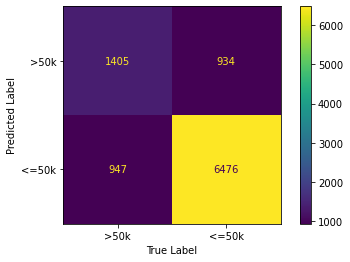

In [336]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

ConfusionMatrixDisplay(confusion_matrix(predict,y_test,labels=[1,0]),
                       display_labels=[">50k","<=50k"]).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
plt.show()

In [ ]:
from sklearn.tree import plot_tree # to draw a classification tree
plt.figure(figsize=(15, 7.5))
plot_tree(best_model.best_estimator_[0], 
          filled=True, 
          rounded=True, 
          class_names=["<=50k", ">50k"],
          feature_names=x_test.columns)

In [342]:
# Save the model using joblib
with open('pipe.joblib', 'wb') as file:
  joblib.dump(best_model, file)

In [343]:
# Under the production environment [joblib]
with open('pipe.joblib', 'rb') as file:
  model = joblib.load(file)

# final model
predict = best_model.predict(x_test)

In [344]:
print(accuracy_score(y_test, predict))
print(classification_report(y_test,predict))

0.8073140749846343
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7410
           1       0.60      0.60      0.60      2352

    accuracy                           0.81      9762
   macro avg       0.74      0.74      0.74      9762
weighted avg       0.81      0.81      0.81      9762



## 1.7 Next

- Data Transforms using numerical data
- Hyperparameter tuning (multiples eval metrics?)
- Analysing overfiting (eval using train dataset)
- Personalize pipeline
- Feature selection
- Other models using Ensemble - RandomForest?